<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/PromptsTop2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets -q

In [6]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("DIBT/10k_prompts_ranked")

# Shuffle the dataset and select the first 1000 entries from the first column
random_prompts = dataset['train'].shuffle(seed=42).select(range(1000))['prompt']

# Now, random_samples contains 1000 random prompts


In [7]:
!pip install top2vec -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 49.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.8 MB/s eta 0:00:00


In [11]:
from top2vec import Top2Vec

# Assuming 'documents' is a list of text documents you wish to model
model = Top2Vec(random_prompts, embedding_model='doc2vec', speed='deep-learn')


# Now you can use the model to find topics, get topic sizes, etc.
topics = model.get_topics()


2024-03-20 15:27:53,844 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-20 15:27:54,384 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-20 15:28:47,160 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-20 15:28:57,124 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-20 15:28:57,183 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [12]:
topics_words, word_scores, topic_nums = model.get_topics()


In [13]:
topics_words

array([['provide', 'such', 'additionally', 'process', 'between', 'work',
        'research', 'learning', 'experience', 'data', 'include', 'our',
        'please', 'well', 'different', 'potential', 'marketing', 'best',
        'including', 'design', 'current', 'these', 'they', 'explain',
        'content', 'than', 'may', 'other', 'will', 'while', 'how',
        'over', 'its', 'their', 'must', 'specific', 'website', 'and',
        'could', 'implementation', 'most', 'into', 'page', 'through',
        'take', 'based', 'make', 'in', 'would', 'world'],
       ['implement', 'snippet', 'task', 'method', 'output', 'takes',
        'should', 'dictionary', 'function', 'input', 'returns', 'code',
        'string', 'methods', 'type', 'python', 'given', 'object',
        'class', 'called', 'list', 'example', 'implementation', 'values',
        'return', 'int', 'complete', 'name', 'value', 'following',
        'provided', 'number', 'model', 'be', 'based', 'the', 'self',
        'an', 'are', 'three', 

In [ ]:
# Assuming 'model' is your trained Top2Vec model and 'keywords' is a list of keywords.
keywords = ["war", "freedom"]
documents, document_score, document_ids = model.search_documents_by_keywords(keywords=keywords, num_docs=10)

# This will return the top 10 most similar documents to the provided keywords,
# their similarity scores, and their IDs within the model.


In [15]:
# Print the results
for i in range(len(documents)):
    print(f"Document ID: {document_ids[i]}")
    print(f"Similarity Score: {document_score[i]}")
    print(f"Document Content: {documents[i][:20]}...")  # Print the first 200 characters to get an idea of the document content
    print("---")

NameError: name 'documents' is not defined

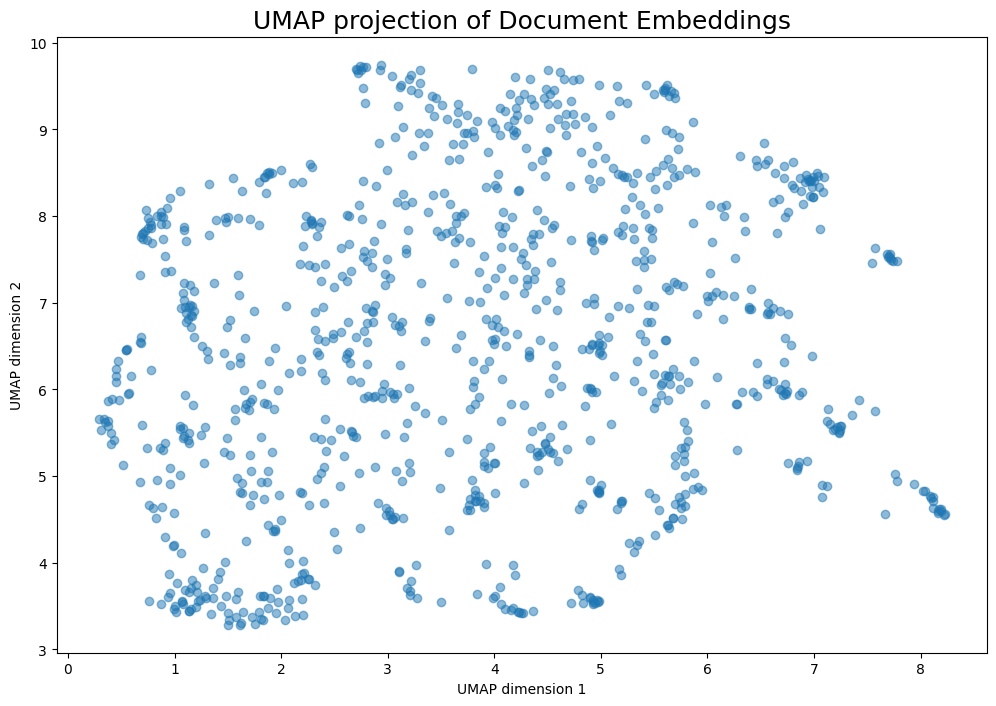

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap  # UMAP for dimensionality reduction

# Assuming 'model' is your trained Top2Vec model

# Retrieve document embeddings from the Top2Vec model
document_embeddings = model.document_vectors

# Reduce the dimensionality of embeddings to 2D for visualization
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(document_embeddings)

# Plot the UMAP embeddings
plt.figure(figsize=(12, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], alpha=0.5)
plt.title('UMAP projection of Document Embeddings', fontsize=18)
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.show()


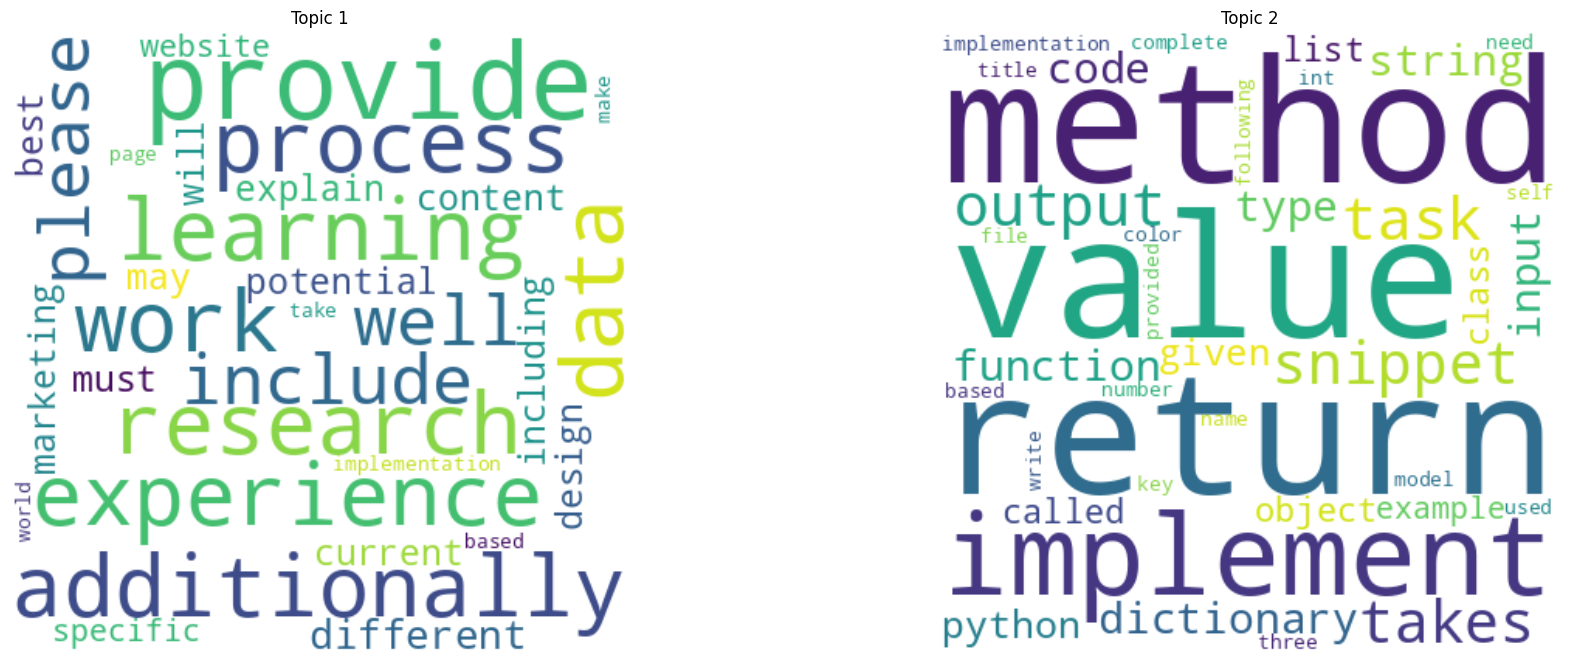

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already retrieved topics_words from your model
# And there are only two topics

# Set up the figure size
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Adjust figsize to your liking

for i in range(2):  # Loop through the two topics
    # Generate a single string with all words for the topic
    topic_words_combined = ' '.join(topics_words[i])

    # Generate the word cloud for this topic
    wordcloud = WordCloud(width=400, height=400,
                          background_color='white',
                          min_font_size=10).generate(topic_words_combined)

    # Plot the WordCloud image
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f'Topic {i+1}')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.5)  # Adjust the width spacing between the subplots

plt.show()
